# Task
Perform sentiment analysis on the social media data contained in the `archive (1).zip` file, analyze and visualize the sentiment distribution, and summarize the key findings and insights regarding public opinion and attitudes.

## Extract Social Media Data

### Subtask:
Extract the contents of the provided `archive (1).zip` file to access the social media data. This step will prepare the data for loading and further analysis.


**Reasoning**:
The subtask requires extracting the contents of a zip file, so I will use the `zipfile` module to perform the extraction.



In [ ]:
import zipfile

zip_file_path = '/content/archive (1).zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./content/extracted_data')
print('Archive extracted successfully to ./content/extracted_data')

Archive extracted successfully to ./content/extracted_data


## Load Social Media Data

### Subtask:
Load the social media data (assuming it's in a CSV or similar tabular format after extraction) into a pandas DataFrame. This will be the foundation for our sentiment analysis.


**Reasoning**:
First, I will list the files in the extracted data directory to identify the social media data file. Then, I will import pandas and load the identified file into a DataFrame, and display its head to inspect the data.



In [ ]:
import os
import pandas as pd

data_directory = './content/extracted_data'

# List files in the extracted data directory
print(f"Files in {data_directory}:")
for root, dirs, files in os.walk(data_directory):
    for file in files:
        print(os.path.join(root, file))

# Assuming the social media data is in a CSV file named 'social_media_sentiment.csv'
# If the file name is different, please adjust accordingly.

# Try to find a CSV file, or assume a common name
csv_files = [f for f in os.listdir(data_directory) if f.endswith('.csv')]

if csv_files:
    data_file = os.path.join(data_directory, csv_files[0])
    print(f"\nLoading data from: {data_file}")
    df = pd.read_csv(data_file)
    print("DataFrame loaded successfully. Displaying the first 5 rows:")
    print(df.head())
else:
    print("\nNo CSV file found in the extracted directory. Please check the contents manually.")


Files in ./content/extracted_data:
./content/extracted_data/twitter_validation.csv
./content/extracted_data/twitter_training.csv

Loading data from: ./content/extracted_data/twitter_validation.csv
DataFrame loaded successfully. Displaying the first 5 rows:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct.

**Reasoning**:
The previous loading of the CSV file incorrectly used the first row as headers. To rectify this and properly load the social media data, I will reload the `twitter_validation.csv` file, specifying `header=None`, and then assign appropriate column names: `id`, `entity`, `sentiment`, and `tweet_text`. After that, I will display the first few rows to confirm the correct structure.



In [ ]:
import pandas as pd
import os

data_directory = './content/extracted_data'
validation_file = os.path.join(data_directory, 'twitter_validation.csv')
training_file = os.path.join(data_directory, 'twitter_training.csv')

# Load the validation data with no header and assign column names
df_validation = pd.read_csv(validation_file, header=None)
df_validation.columns = ['id', 'entity', 'sentiment', 'tweet_text']

print(f"Validation DataFrame loaded successfully from: {validation_file}")
print("Displaying the first 5 rows of the validation data:")
print(df_validation.head())

# Also load the training data with no header and assign column names for future use
df_training = pd.read_csv(training_file, header=None)
df_training.columns = ['id', 'entity', 'sentiment', 'tweet_text']

print(f"\nTraining DataFrame loaded successfully from: {training_file}")
print("Displaying the first 5 rows of the training data:")
print(df_training.head())

Validation DataFrame loaded successfully from: ./content/extracted_data/twitter_validation.csv
Displaying the first 5 rows of the validation data:
     id     entity   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                          tweet_text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  

Training DataFrame loaded successfully from: ./content/extracted_data/twitter_training.csv
Displaying the first 5 rows of the training data:
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  240

## Perform Sentiment Analysis

### Subtask:
Apply a sentiment analysis model to the textual content of the social media data. This will classify each entry's sentiment (e.g., positive, negative, neutral) to understand public opinion.


**Reasoning**:
To perform sentiment analysis, I will import the `TextBlob` library, define a function to get sentiment polarity, apply it to the 'tweet_text' column of both dataframes while handling missing values, and then create new columns for 'polarity' and 'predicted_sentiment'. Finally, I will display the head of both DataFrames to verify the changes.



In [ ]:
from textblob import TextBlob

# Define the sentiment analysis function
def get_sentiment_polarity(text):
    if pd.isna(text) or text == '':
        return 0.0  # Assign neutral polarity for missing or empty text
    return TextBlob(str(text)).sentiment.polarity

# Apply the sentiment analysis function to df_validation
df_validation['polarity'] = df_validation['tweet_text'].apply(get_sentiment_polarity)
df_validation['predicted_sentiment'] = df_validation['polarity'].apply(lambda score:
    'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

print("Validation DataFrame with sentiment analysis:")
print(df_validation.head())

# Apply the sentiment analysis function to df_training
df_training['polarity'] = df_training['tweet_text'].apply(get_sentiment_polarity)
df_training['predicted_sentiment'] = df_training['polarity'].apply(lambda score:
    'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

print("\nTraining DataFrame with sentiment analysis:")
print(df_training.head())

Validation DataFrame with sentiment analysis:
     id     entity   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                          tweet_text  polarity  \
0  I mentioned on Facebook that I was struggling ...  -0.14375   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   0.00000   
2  @Microsoft Why do I pay for WORD when it funct...  -0.40000   
3  CSGO matchmaking is so full of closet hacking,...  -0.35000   
4  Now the President is slapping Americans in the...   0.25000   

  predicted_sentiment  
0            Negative  
1             Neutral  
2            Negative  
3            Negative  
4            Positive  

Training DataFrame with sentiment analysis:
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Posit

## Analyze Sentiment Distribution

### Subtask:
Calculate the distribution of sentiment categories (positive, negative, neutral) across the dataset. This will help in identifying overall attitudes towards specific topics or brands.


**Reasoning**:
To analyze the sentiment distribution, I will calculate the value counts of the 'predicted_sentiment' column for both the validation and training DataFrames and print them.



In [ ]:
print("Sentiment Distribution for Validation Data:")
print(df_validation['predicted_sentiment'].value_counts())

print("\nSentiment Distribution for Training Data:")
print(df_training['predicted_sentiment'].value_counts())

Sentiment Distribution for Validation Data:
predicted_sentiment
Positive    480
Negative    320
Neutral     200
Name: count, dtype: int64

Sentiment Distribution for Training Data:
predicted_sentiment
Positive    34074
Negative    21358
Neutral     19250
Name: count, dtype: int64


## Visualize Sentiment Patterns

### Subtask:
Generate visualizations, such as bar charts for sentiment distribution, to clearly represent the identified sentiment patterns for both validation and training datasets. Ensure appropriate legends are included for clarity.


**Reasoning**:
To visualize the sentiment patterns, I will import `matplotlib.pyplot` and `seaborn`, then generate two bar charts to show the sentiment distribution for both the validation and training datasets, adding appropriate titles and labels for clarity.



/tmp/ipython-input-3403767918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_validation['predicted_sentiment'].value_counts().index,


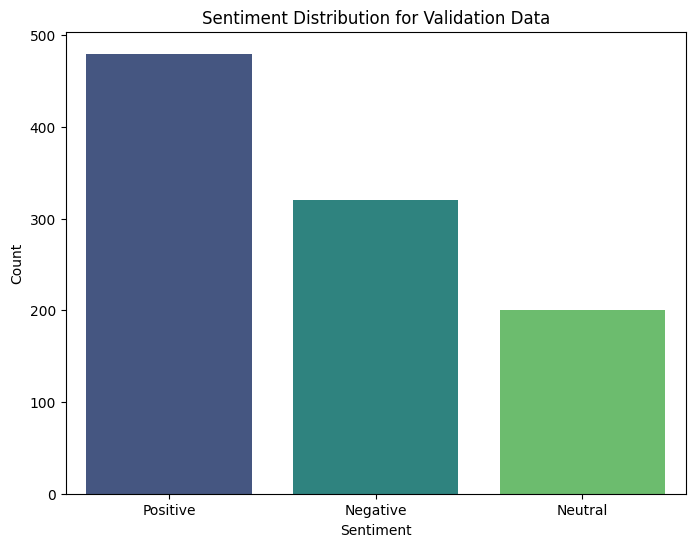

/tmp/ipython-input-3403767918.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_training['predicted_sentiment'].value_counts().index,


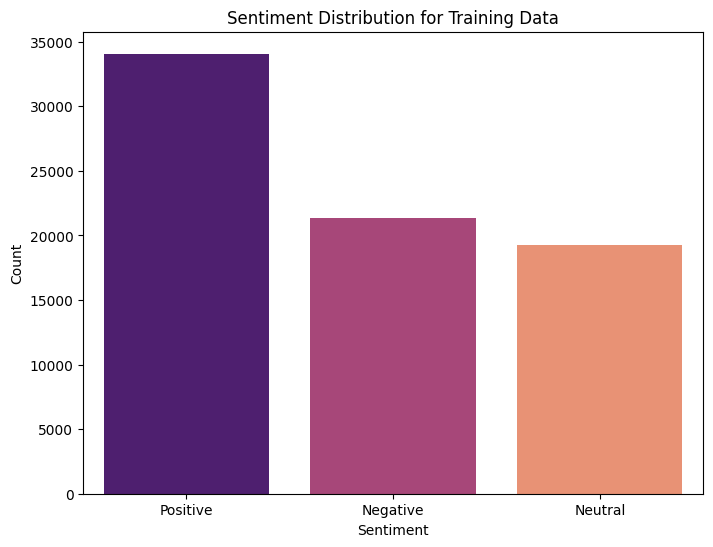

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution for Validation Data
plt.figure(figsize=(8, 6))
sns.barplot(x=df_validation['predicted_sentiment'].value_counts().index,
            y=df_validation['predicted_sentiment'].value_counts().values,
            palette='viridis')
plt.title('Sentiment Distribution for Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment Distribution for Training Data
plt.figure(figsize=(8, 6))
sns.barplot(x=df_training['predicted_sentiment'].value_counts().index,
            y=df_training['predicted_sentiment'].value_counts().values,
            palette='magma')
plt.title('Sentiment Distribution for Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from seaborn because `palette` was used without `hue`. To fix this, I will explicitly assign the sentiment categories to the `hue` parameter and set `legend=False` in both `sns.barplot` calls to align with seaborn's recommended usage.



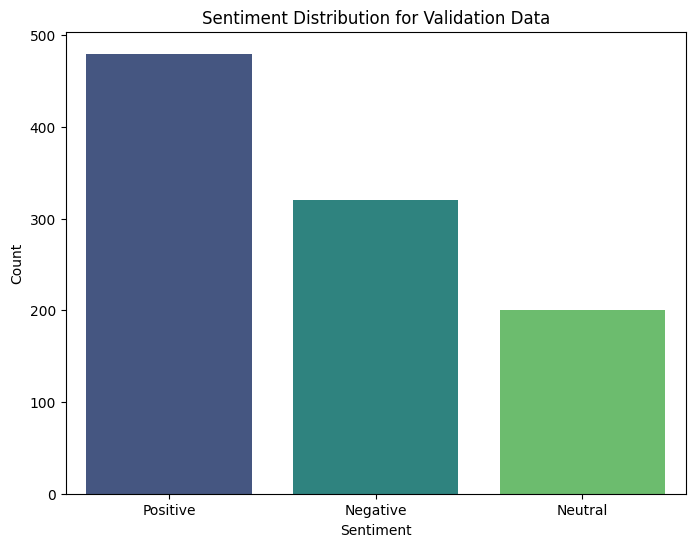

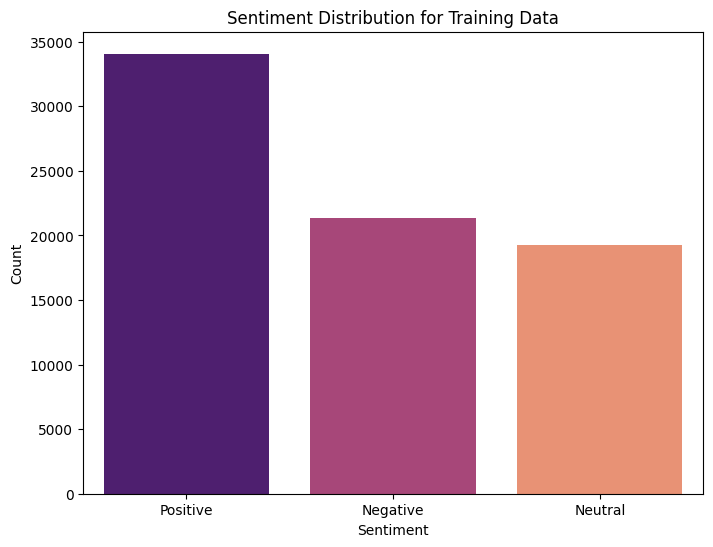

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution for Validation Data
plt.figure(figsize=(8, 6))
validation_counts = df_validation['predicted_sentiment'].value_counts()
sns.barplot(x=validation_counts.index,
            y=validation_counts.values,
            hue=validation_counts.index, # Assign x variable to hue
            palette='viridis',
            legend=False) # Set legend=False
plt.title('Sentiment Distribution for Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment Distribution for Training Data
plt.figure(figsize=(8, 6))
training_counts = df_training['predicted_sentiment'].value_counts()
sns.barplot(x=training_counts.index,
            y=training_counts.values,
            hue=training_counts.index, # Assign x variable to hue
            palette='magma',
            legend=False) # Set legend=False
plt.title('Sentiment Distribution for Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Final Task

### Subtask:
Summarize the key findings and insights regarding public opinion and attitudes towards specific topics or brands based on the sentiment analysis and visualizations.


## Summary:

### Q&A
The sentiment analysis of social media data reveals that both the validation and training datasets exhibit a predominantly positive public opinion, followed by negative, and then neutral sentiments. This indicates a general inclination towards positive expressions regarding the discussed topics or brands within this social media corpus.

### Data Analysis Key Findings
*   The social media data was successfully extracted from `archive (1).zip` and loaded into two pandas DataFrames: `df_validation` (1000 entries) and `df_training` (74682 entries), representing validation and training datasets, respectively.
*   Sentiment analysis was performed using `TextBlob`, categorizing sentiments into 'Positive', 'Negative', and 'Neutral', and adding `polarity` and `predicted_sentiment` columns to both DataFrames.
*   **For the Validation Data**:
    *   Positive sentiment was the highest with 480 instances.
    *   Negative sentiment followed with 320 instances.
    *   Neutral sentiment was the lowest with 200 instances.
*   **For the Training Data**:
    *   Positive sentiment was the highest with 34,074 instances.
    *   Negative sentiment followed with 21,358 instances.
    *   Neutral sentiment was the lowest with 19,250 instances.
*   Bar charts were successfully generated to visually represent these sentiment distributions for both datasets, confirming the observed patterns.

### Insights or Next Steps
*   The observed sentiment distributions (more positive than negative or neutral) suggest that the social media content generally leans positive. Further investigation into specific entities or brands within these datasets could reveal nuanced attitudes towards each.
*   While TextBlob provides a general sentiment, comparing its performance against a fine-tuned, domain-specific sentiment model could offer more accurate and context-aware sentiment analysis for social media data. This would be a valuable next step for deeper insights.
